In [1]:
## reading data

In [2]:
%load_ext autoreload
%autoreload 2


import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from pathlib import Path
import seaborn as sns

import os
import sys

In [3]:
# chaging directory

In [4]:
root, *_ = !pwd

In [5]:
if root.endswith('notebooks'):
    os.chdir('../')
    root, *_ = !pwd
    sys.path.append('src/')

In [6]:
os.getcwd()

'/home/med/projects/competitions/mlb-kaggle'

In [7]:
from dotenv import load_dotenv
load_dotenv()

True

In [8]:
PROCESSED_PATH = Path(os.environ['ROOT_DIR']) / 'processed'

In [9]:
RAW_PATH = Path(os.environ['RAW_PATH'])

In [10]:
os.listdir(PROCESSED_PATH)

['target.csv', 'raw_data.csv']

In [11]:
os.listdir(RAW_PATH)

['seasons.csv',
 'teams.csv',
 'example_sample_submission.csv',
 'train.csv',
 'mlb-player-digital-engagement-forecasting.zip',
 'awards.csv',
 'players.csv',
 'example_test.csv',
 'mlb']

In [12]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from pathlib import Path
import seaborn as sns

In [13]:
dates_cols = ['date', 'mlbDebutDate', 'DOB', 'rosterDate', 'pstatsDate']

df = pd.read_csv(PROCESSED_PATH / 'raw_data.csv',
                 parse_dates=dates_cols)

/home/med/anaconda3/envs/mlb/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (99) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [14]:
df.head()

,playerId,target1,target2,target3,target4,date,home,gameType,isTie,gamesInSeries,...,year,inSeason,seasonPart,DOB,mlbDebutDate,birthCountry,weight,primaryPositionName,height,playerBMI
0,112526,0.055277,5.496109,0.025839,16.176471,2018-01-01,NaN,NaN,NaN,NaN,...,2018,False,Offseason,1973-05-24,1997-04-04,Dominican Republic,129.27372,Pitcher,1.8034,39.748992
1,112526,0.060625,3.252914,0.030486,8.541353,2018-01-02,NaN,NaN,NaN,NaN,...,2018,False,Offseason,1973-05-24,1997-04-04,Dominican Republic,129.27372,Pitcher,1.8034,39.748992
2,112526,0.029341,1.648352,0.032613,10.490112,2018-01-03,NaN,NaN,NaN,NaN,...,2018,False,Offseason,1973-05-24,1997-04-04,Dominican Republic,129.27372,Pitcher,1.8034,39.748992
3,112526,0.014799,2.665894,0.087422,19.091467,2018-01-04,NaN,NaN,NaN,NaN,...,2018,False,Offseason,1973-05-24,1997-04-04,Dominican Republic,129.27372,Pitcher,1.8034,39.748992
4,112526,0.083916,1.161002,0.024759,6.643880,2018-01-05,NaN,NaN,NaN,NaN,...,2018,False,Offseason,1973-05-24,1997-04-04,Dominican Republic,129.27372,Pitcher,1.8034,39.748992


In [15]:
### time and player data 

_players = pd.read_csv(RAW_PATH / 'players.csv')

_players['playerForTestSetAndFuturePreds'].fillna(False, inplace=True)

player_in_test = _players.query('playerForTestSetAndFuturePreds')['playerId']

In [16]:
from data.util import filter_by_date, filter_by_id

In [17]:
# filter only test players
df = filter_by_id(df, player_in_test)

In [18]:
# if you want to run on a sample,
# change sample_size to the number of players in the sample
sample_size = 10
# sample_size = None

if sample_size is not None and sample_size > 0:
    df['target_avg'] = df[[f'target{i}' for i in range(1, 5)]].mean(axis=1)
    playerList = df.groupby(['playerId'])['target_avg'].std().sort_values(ascending=False).reset_index()
    df = filter_by_id(df, playerList['playerId'].head(sample_size))
    df.drop('target_avg', axis=1, inplace=True)

In [19]:
df.playerId.nunique()

10

In [20]:
# player stats

In [21]:
df.head()

,playerId,target1,target2,target3,target4,date,home,gameType,isTie,gamesInSeries,...,year,inSeason,seasonPart,DOB,mlbDebutDate,birthCountry,weight,primaryPositionName,height,playerBMI
0,519317,0.974327,56.177043,13.693746,64.166667,2018-01-01,NaN,NaN,NaN,NaN,...,2018,False,Offseason,1989-11-08,2010-06-08,USA,111.13004,Designated Hitter,1.9812,28.312279
1,519317,0.743145,31.715912,11.397756,47.248120,2018-01-02,NaN,NaN,NaN,NaN,...,2018,False,Offseason,1989-11-08,2010-06-08,USA,111.13004,Designated Hitter,1.9812,28.312279
2,519317,0.741518,30.998168,25.975685,79.879622,2018-01-03,NaN,NaN,NaN,NaN,...,2018,False,Offseason,1989-11-08,2010-06-08,USA,111.13004,Designated Hitter,1.9812,28.312279
3,519317,0.434217,40.828745,6.552563,86.740331,2018-01-04,NaN,NaN,NaN,NaN,...,2018,False,Offseason,1989-11-08,2010-06-08,USA,111.13004,Designated Hitter,1.9812,28.312279
4,519317,1.700575,20.981956,26.427778,34.202094,2018-01-05,NaN,NaN,NaN,NaN,...,2018,False,Offseason,1989-11-08,2010-06-08,USA,111.13004,Designated Hitter,1.9812,28.312279


In [22]:
list(df.columns)

['playerId',
 'target1',
 'target2',
 'target3',
 'target4',
 'date',
 'home',
 'gameType',
 'isTie',
 'gamesInSeries',
 'playerTeamWins',
 'playerTeamLosses',
 'playerTeamWinPct',
 'playerTeamWinner',
 'playerTeamScore',
 'opponentTeamId',
 'opponentTeamWins',
 'opponentTeamLosses',
 'opponentTeamWinPct',
 'opponentTeamScore',
 'teamScoreDiff',
 'pstatsDate',
 'battingOrder',
 'gamesPlayedBatting',
 'flyOuts',
 'groundOuts',
 'runsScored',
 'doubles',
 'triples',
 'homeRuns',
 'strikeOuts',
 'baseOnBalls',
 'intentionalWalks',
 'hits',
 'hitByPitch',
 'atBats',
 'caughtStealing',
 'stolenBases',
 'groundIntoDoublePlay',
 'groundIntoTriplePlay',
 'plateAppearances',
 'totalBases',
 'rbi',
 'leftOnBase',
 'sacBunts',
 'sacFlies',
 'catchersInterference',
 'pickoffs',
 'gamesPlayedPitching',
 'gamesStartedPitching',
 'completeGamesPitching',
 'shutoutsPitching',
 'winsPitching',
 'lossesPitching',
 'flyOutsPitching',
 'airOutsPitching',
 'groundOutsPitching',
 'runsPitching',
 'doublesPi

In [23]:
### preprocessing with pipelines

from typing import List
def forward_fill(df: pd.DataFrame, features: List[str],
                 on='playerId',
                 suffix: str = None,
                 limit: int =None):
    ffilled_df = df.groupby(on)[features].ffill(limit=limit)
    output_features = (features if suffix is None else
                       list(map(lambda f: suffix + f, features)))
    outputX = df.copy()
    outputX.loc[:, output_features] = ffilled_df.to_numpy()
    return outputX

def gen_hardcoded_features(df: pd.DataFrame):
    # some feature eng for the dates
    df['pstatsTime'] = (df['date'] - pd.to_datetime(df['pstatsDate'])).dt.total_seconds()
    df['playerAge'] = (df['date'] - df['DOB']).dt.total_seconds()
    df['playerTSinceDebut'] = (df['date'] - df['mlbDebutDate']).dt.total_seconds()
    df['playerDebutAge'] = (df['mlbDebutDate'] - df['DOB']).dt.total_seconds()
    df['rostersTime'] = (df['date'] - pd.to_datetime(df['rosterDate'])).dt.total_seconds()
    df[['rostersTime', 'pstatsTime']] /= 60 * 60 * 24
    # normalize
    df[['playerAge', 'playerTSinceDebut', 'playerDebutAge']] /= 60 * 60 * 24 * 365
    df['AwardWinner'] = df['awardId'].isna().astype(np.float64)
    return df

def fillna(df: pd.DataFrame, fill_value=-1):
    return df.fillna(-1)

In [24]:
from pipeline.core import FunctionTransformer, Pipeline, PdColumnTransformer, PdFeatureUnion
from pipeline.continuous import PdScaleNorm, FilterContinuousFeatures, MedianFillNaN
from pipeline.stats import StatisticGen, LagGen, FeaturesTable
from pipeline.categories import Categorify
from pipeline.season import join_season_info
from pipeline.players import join_players_info

In [25]:
last_ffill_features = ['gameType',
 'isTie',
 'gamesInSeries',
 'playerTeamWins',
 'playerTeamLosses',
 'playerTeamWinPct',
 'playerTeamWinner',
 'playerTeamScore',
 'opponentTeamWins',
 'opponentTeamLosses',
 'opponentTeamWinPct',
 'opponentTeamScore',
 'teamScoreDiff',
 'opponentTeamId'] + ['battingOrder', 'gamesPlayedBatting', 'flyOuts', 'groundOuts',
       'runsScored', 'doubles', 'triples', 'homeRuns', 'strikeOuts',
       'baseOnBalls', 'intentionalWalks', 'hits', 'hitByPitch', 'atBats',
       'caughtStealing', 'stolenBases', 'groundIntoDoublePlay',
       'groundIntoTriplePlay', 'plateAppearances', 'totalBases', 'rbi',
       'leftOnBase', 'sacBunts', 'sacFlies', 'catchersInterference',
       'pickoffs', 'gamesPlayedPitching', 'gamesStartedPitching',
       'completeGamesPitching', 'shutoutsPitching', 'winsPitching',
       'lossesPitching', 'flyOutsPitching', 'airOutsPitching',
       'groundOutsPitching', 'runsPitching', 'doublesPitching',
       'triplesPitching', 'homeRunsPitching', 'strikeOutsPitching',
       'baseOnBallsPitching', 'intentionalWalksPitching', 'hitsPitching',
       'hitByPitchPitching', 'atBatsPitching', 'caughtStealingPitching',
       'stolenBasesPitching', 'inningsPitched', 'saveOpportunities',
       'earnedRuns', 'battersFaced', 'outsPitching', 'pitchesThrown', 'balls',
       'strikes', 'hitBatsmen', 'balks', 'wildPitches', 'pickoffsPitching',
       'rbiPitching', 'gamesFinishedPitching', 'inheritedRunners',
       'inheritedRunnersScored', 'catchersInterferencePitching',
       'sacBuntsPitching', 'sacFliesPitching', 'saves', 'holds', 'blownSaves',
       'assists', 'putOuts', 'errors', 'chances']
                          
                          
inplace_ffill_features = ['numberOfFollowers',
                          'teamFollowers',
                          'status',
                          'teamId',
                          'rosterDate',
                          'pstatsDate']

# transformer for filling nan values with past valid values
# transformer for generating some hardcoded features
inplace_fill_forward_tmf = FunctionTransformer(forward_fill,
                                               kw_args={'features': inplace_ffill_features})
last_fill_forward_tmf = FunctionTransformer(forward_fill,
                                            kw_args={'features': last_ffill_features,
                                                     'suffix': 'last_'})
join_players_tmf = FunctionTransformer(join_players_info, kw_args={'path_to_players': RAW_PATH / 'players.csv'})
harcoded_feat_tmf = FunctionTransformer(gen_hardcoded_features)

# creating pipeline
ffill_and_gen_harcoded_feat = Pipeline([('inplace_fill_forward', inplace_fill_forward_tmf),
                                       ('last_fill_forward', last_fill_forward_tmf),
                                       ('hardcoded_feat', harcoded_feat_tmf)])

In [26]:
# features to use for target preprocessing
target_cols = ['target1', 'target2', 'target3', 'target4']
index_cols = ['date', 'playerId']
pp_cols = target_cols + index_cols

In [27]:
# categories encoding
categories = ['playerId', 'seasonPart', 'year', 'primaryPositionName',
              'status', 'teamId', 'awardId', 'gameType',
              'opponentTeamId', 'home', 'last_opponentTeamId', 'last_gameType']

categories_tmf = PdColumnTransformer([(category, Categorify(add_nan=True), category)
                                       for category in categories])

In [28]:
# for the statistics, we will compute them and then resuse them
stats_gen_tmf = StatisticGen(stats=['mean', 'median', 'std'], windows=[90], drop_index=False)
target_stats_tmf = PdColumnTransformer([('gen_stats', stats_gen_tmf, pp_cols)])
target_stats_table = target_stats_tmf.fit_transform(df)

In [29]:
target_stats_table.head()

,playerId,date,target1__mean__90d,target1__median__90d,target1__std__90d,target2__mean__90d,target2__median__90d,target2__std__90d,target3__mean__90d,target3__median__90d,target3__std__90d,target4__mean__90d,target4__median__90d,target4__std__90d
0,519317,2018-01-01,0.974327,0.974327,NaN,56.177044,56.177044,NaN,13.693746,13.693746,NaN,64.166664,64.166664,NaN
1,519317,2018-01-02,0.858736,0.858736,0.163470,43.946476,43.946476,17.296631,12.545751,12.545751,1.623510,55.707394,55.707394,11.963219
2,519317,2018-01-03,0.819663,0.743145,0.133945,39.630375,31.715912,14.334328,17.022396,13.693746,7.838299,63.764801,64.166664,16.319462
3,519317,2018-01-04,0.723302,0.742332,0.221592,39.929966,36.272327,11.719257,14.404937,12.545751,8.268230,69.508682,72.023148,17.593142
4,519317,2018-01-05,0.918756,0.743145,0.477326,36.140366,31.715912,13.221618,16.809505,13.693746,8.954467,62.447369,64.166664,21.941971


In [30]:
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.base import BaseEstimator, TransformerMixin

class PdVectorDiscretizer(KBinsDiscretizer):
    def __init__(self, n_bins: int, strategy: str = 'quantile'):
        super().__init__(n_bins=n_bins, strategy=strategy, encode='ordinal')
        
    def to_matrix(self, X: pd.Series):
        X = X.dropna().to_numpy()
        X = X[:, None]
        return X
    
    def fit(self, X: pd.Series, y=None):
        X = self.to_matrix(X)
        return super().fit(X, y)

    def transform(self, X: pd.Series):
        notnan = X.notna()
        outputX = np.zeros((len(X), 1)).astype(np.int64)

        if notnan.sum() > 0:
            Xm = self.to_matrix(X)
            discreteX = super().transform(Xm).astype(np.int64)
            discreteX += 1
            outputX[notnan] = discreteX
        outputX = pd.DataFrame(outputX, columns=[X.name])
        return outputX

class PdDiscretizer(BaseEstimator, TransformerMixin):
    def __init__(self, n_bins: int, strategy: str = 'quantile'):
        self.n_bins=n_bins
        self.strategy=strategy
    
    def fit(self, X: pd.DataFrame, y=None):
        tmfs = {}
        for feature in X:
            tmf = PdVectorDiscretizer(self.n_bins, self.strategy)
            tmfs[feature] = tmf.fit(X.loc[:, feature])
        self.tmfs = tmfs
        return self

    def transform(self, X: pd.DataFrame):
        return pd.concat([tmf.transform(X.loc[:, feature])
                          for feature, tmf in self.tmfs.items()], axis=1)

In [31]:
from itertools import combinations
from typing import List, Union

class SingleInteractionComputer:
    def __init__(self, features: List[Union[int, str]],
                 fill_nan: str = 'NaN'):
        self.features = list(features)
        self.fill_nan = fill_nan
        self.interaction_name = 'X'.join(self.features)
        
    def compute_matrices(self, X: pd.DataFrame):
        return X.loc[:, self.features].fillna(self.fill_nan)
        
    def fit(self, X: pd.DataFrame):
        X = self.compute_matrices(X)
        table = X.drop_duplicates()
        table.loc[:, self.interaction_name] = np.arange(len(table))
        self.table = table
        
    def transform(self, X: pd.DataFrame):
        outputX = self.compute_matrices(X)
        outputX = outputX.merge(self.table, on=self.features, how='left')
        outputX.drop(self.features, axis=1, inplace=True)
        assert len(outputX) == len(X)
        assert len(outputX.columns) == 1
        return outputX
        

class InteractionEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, iteraction_level: int = 2):
        self.iteraction_level = iteraction_level
        
    def gen_interaction_indexes(self, features: List[Union[int, str]]):
        interactions = []
        for level in range(2, self.iteraction_level+1):
            combination = list(combinations(features, level))
            interactions += combination
        return interactions
    
    def fit(self, X: pd.DataFrame, y = None):
        features = list(X.columns)
        total_interactions = self.gen_interaction_indexes(features)
        self.tmfs = {}
        for interaction in total_interactions:
            tmf = SingleInteractionComputer(interaction)
            tmf.fit(X)
            self.tmfs[tmf.interaction_name] = tmf
    
    def transform(self, X: pd.DataFrame):
        return pd.concat([tmf.transform(X) 
                          for tmf in self.tmfs.values()], axis=1)

In [32]:
target_N_BINS = 25

In [33]:
## merge computed statistics
reuse_computed_stats = Pipeline([('merge_stats', FeaturesTable(target_stats_table, lags=[60], clip_max=True)),
                                 ('discrete', PdDiscretizer(target_N_BINS)),
                                ])

# for continuous features, we will filter them and then fill nan values and normalize them

In [34]:
median_fillnan_columns = ['numberOfFollowers', 'teamFollowers',
                          'playerDebutAge', 'playerAge', 'playerTSinceDebut']
fillnan_median_tmf = MedianFillNaN(median_fillnan_columns)

# get the rest of the continuous features
continuous_feat_tmf = Pipeline([('get_cont_feat', FilterContinuousFeatures(ignore_features=categories +
                                                                           pp_cols +
                                                                           ['target_avg'])),
                                ('discrete', PdDiscretizer(5, 'uniform')),
                                
                               ])

In [35]:
# putting all features generation steps together
all_features_tmf = PdFeatureUnion([('stats', reuse_computed_stats), 
                                   ('cont_feat', continuous_feat_tmf), 
                                   ('cats', categories_tmf),
                                   ])
all_features_pipeline = Pipeline([('gen_features', all_features_tmf),
                                  ('interaction', InteractionEncoder())])

In [36]:
# main pipeline with all steps 
pipeline = Pipeline([('core_features', ffill_and_gen_harcoded_feat),
                     ('features_generation', all_features_pipeline)])

pipeline

Pipeline(steps=[('core_features',
                 Pipeline(steps=[('inplace_fill_forward',
                                  FunctionTransformer(func=<function forward_fill at 0x7f2e3064f8b0>,
                                                      kw_args={'features': ['numberOfFollowers',
                                                                            'teamFollowers',
                                                                            'status',
                                                                            'teamId',
                                                                            'rosterDate',
                                                                            'pstatsDate']})),
                                 ('last_fill_forward',
                                  FunctionTransformer(func=<function forward_fill at 0x7f2e3064f8b0>,
                                                      kw_args={'features': ['g...
                     

In [37]:
from data.split import SplitData

# split the data on 2021-03-01 with a valid ds of 61 days
sp = SplitData("2021-03-01", test_days=61)

In [38]:
train_idx = sp.train_idx(df)
valid_idx = sp.valid_idx(df)

In [39]:
%%time
# train the pipeline only with the train dataset
pipeline.fit(sp.filter(df, train_idx))

/home/med/anaconda3/envs/mlb/lib/python3.8/site-packages/sklearn/preprocessing/_discretization.py:187: UserWarning: Feature 0 is constant and will be replaced with 0.
  warnings.warn("Feature %d is constant and will be "
/home/med/anaconda3/envs/mlb/lib/python3.8/site-packages/sklearn/preprocessing/_discretization.py:187: UserWarning: Feature 0 is constant and will be replaced with 0.
  warnings.warn("Feature %d is constant and will be "
/home/med/anaconda3/envs/mlb/lib/python3.8/site-packages/sklearn/preprocessing/_discretization.py:187: UserWarning: Feature 0 is constant and will be replaced with 0.
  warnings.warn("Feature %d is constant and will be "
/home/med/anaconda3/envs/mlb/lib/python3.8/site-packages/sklearn/preprocessing/_discretization.py:187: UserWarning: Feature 0 is constant and will be replaced with 0.
  warnings.warn("Feature %d is constant and will be "
/home/med/anaconda3/envs/mlb/lib/python3.8/site-packages/sklearn/preprocessing/_discretization.py:187: UserWarning: 

CPU times: user 1min 4s, sys: 104 ms, total: 1min 4s
Wall time: 1min 4s


Pipeline(steps=[('core_features',
                 Pipeline(steps=[('inplace_fill_forward',
                                  FunctionTransformer(func=<function forward_fill at 0x7f2e3064f8b0>,
                                                      kw_args={'features': ['numberOfFollowers',
                                                                            'teamFollowers',
                                                                            'status',
                                                                            'teamId',
                                                                            'rosterDate',
                                                                            'pstatsDate']})),
                                 ('last_fill_forward',
                                  FunctionTransformer(func=<function forward_fill at 0x7f2e3064f8b0>,
                                                      kw_args={'features': ['g...
                     

In [40]:
%%time
# transform all dataset
features = pipeline.transform(df)

CPU times: user 1min 53s, sys: 2.49 s, total: 1min 56s
Wall time: 1min 56s


In [41]:
features.shape

(12160, 20503)

In [ ]:
pd.options.display.max_rows = max(150, len(features.columns))
features.head(len(features.columns)).T

In [ ]:
# change the dtypes of the target (pytorch likes float32 and not float64)
df[target_cols] = df[target_cols].astype(np.float32)

In [ ]:
train_idx.shape

In [ ]:
train_idx.shape

In [ ]:
train_data = sp.filter(features, train_idx)

In [ ]:
raw_train_df = sp.filter(df, train_idx)

In [ ]:
valid_data = sp.filter(features, valid_idx)
raw_valid_df = sp.filter(df, valid_idx)

In [ ]:
train_data.shape, raw_train_df.shape

In [ ]:
valid_data.shape, raw_valid_df.shape

In [ ]:
# add the target to features ds
train_data[target_cols + ['date']] = raw_train_df[target_cols + ['date']]
valid_data[target_cols + ['date']] = raw_valid_df[target_cols + ['date']]

### modeling 

In [ ]:
# time_features = ['battingOrder', 'gamesPlayedBatting', 'flyOuts', 'groundOuts',
#        'runsScored', 'doubles', 'triples', 'homeRuns', 'strikeOuts',
#        'baseOnBalls', 'intentionalWalks', 'hits', 'hitByPitch', 'atBats',
#        'caughtStealing', 'stolenBases', 'groundIntoDoublePlay',
#        'groundIntoTriplePlay', 'plateAppearances', 'totalBases', 'rbi',
#        'leftOnBase', 'sacBunts', 'sacFlies', 'catchersInterference',
#        'pickoffs', 'gamesPlayedPitching', 'gamesStartedPitching',
#        'completeGamesPitching', 'shutoutsPitching', 'winsPitching',
#        'lossesPitching', 'flyOutsPitching', 'airOutsPitching',
#        'groundOutsPitching', 'runsPitching', 'doublesPitching',
#        'triplesPitching', 'homeRunsPitching', 'strikeOutsPitching',
#        'baseOnBallsPitching', 'intentionalWalksPitching', 'hitsPitching',
#        'hitByPitchPitching', 'atBatsPitching', 'caughtStealingPitching',
#        'stolenBasesPitching', 'inningsPitched', 'saveOpportunities',
#        'earnedRuns', 'battersFaced', 'outsPitching', 'pitchesThrown', 'balls',
#        'strikes', 'hitBatsmen', 'balks', 'wildPitches', 'pickoffsPitching',
#        'rbiPitching', 'gamesFinishedPitching', 'inheritedRunners',
#        'inheritedRunnersScored', 'catchersInterferencePitching',
#        'sacBuntsPitching', 'sacFliesPitching', 'saves', 'holds', 'blownSaves',
#        'assists', 'putOuts', 'errors', 'chances', 'isTie',
#        'gamesInSeries', 'playerTeamWins', 'playerTeamLosses',
#        'playerTeamWinPct', 'playerTeamScore', 'opponentTeamWins',
#        'opponentTeamLosses', 'opponentTeamWinPct', 'opponentTeamScore',
#        'teamScoreDiff', 'AwardWinner']

In [ ]:
cont_features = features.columns.drop(categories).to_list()

In [ ]:
cont_features

In [405]:
# from omegaconf import OmegaConf
# hp = {'bptt': 14,
#       'epochs': 10,
#       'batch_size': 512,
#       'max_emb_sz': 20,
#       'hidden_dim': 16,
#       'encoder_dim': 128,
#       'emb_dropout': 0.2,
#       'dropout': 0.2,
#       'lr': 0.001,
#       'wd': 3e-5}

# real_data_config = {'hp': hp,
#                     'seed': 2021,
#          'static_features': static_features,
#           'categories': categories,
#           'time_features': time_features,
#           'target_cols': target_cols}
# real_data_config = OmegaConf.create(real_data_config) 

In [417]:
batch_size=64

In [418]:
train_ds = PlayerDataset.from_df(train_data,
                                  features=[],
                                  categories=categories + cont_features,
                                  target=target_cols,
                                  )

In [419]:
train_dl = DataLoader(train_ds, batch_size=batch_size, shuffle=True,
                      num_workers=4)

In [420]:
valid_ds = PlayerDataset.from_df(valid_data, 
                                  features=[],
                                  categories=categories + cont_features,
                                  target=target_cols,
                                  )
valid_dl = DataLoader(valid_ds, batch_size=batch_size,
                      shuffle=False, num_workers=4)

In [450]:
cat_szs = list(train_data.loc[:, categories + cont_features].max())

In [451]:
model = MLBTransformer(cont_features=len([]),
                       categories=cat_szs,
                       emb_features=16,
                       encoder_dim=128,
                       out_features=len(target_cols),
                       lr=0.001,
                       wd=3e-5,
                       attn_dropout=0.2,
                       ff_dropout=0.2,
                       decoder_dropout=0.2,
                       emb_dropout=0.2)

In [452]:
batch = next(iter(train_dl))

In [453]:
from pytorch_lightning.callbacks import EarlyStopping
early_stopping = EarlyStopping('valid_mae', patience=3)

In [454]:
trainer = pl.Trainer(max_epochs=10)
trainer.fit(model, train_dl, valid_dl)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores

  | Name         | Type       | Params
--------------------------------------------
0 | emb          | Sequential | 25.3 K
1 | output_layer | Sequential | 416 K 
--------------------------------------------
441 K     Trainable params
0         Non-trainable params
441 K     Total params
1.768     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

/home/med/anaconda3/envs/mlb/lib/python3.8/site-packages/pytorch_lightning/core/step_result.py:115: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  value = torch.tensor(value, device=device, dtype=torch.float)


Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

In [455]:
# model.do_attn(False)

In [456]:
# trainer.fit(model, train_dl, valid_dl)

In [457]:
# trainer = pl.Trainer(max_epochs=10, callbacks=[early_stopping])
# model.do_attn(True)

In [458]:
# trainer.fit(model, train_dl, valid_dl)

In [459]:
def predict_fn(test_features: pd.DataFrame):
        test_ds = PlayerDataset.from_df(test_features,
                                        features=cont_features,
                                  categories=categories,
                                  target=target_cols,
                                  )
        test_dl = DataLoader(test_ds, batch_size=batch_size, shuffle=False)
        prediction = predict_dl(model, test_dl)
        del test_dl, test_ds
        return prediction

In [460]:
from train.core import ModelOutput, Ensemble, predict_recursive

In [461]:
def predict_dl(model: nn.Module, valid_dl: DataLoader):
    model.eval()
    with torch.no_grad():
        prediction = torch.cat([model(**batch)
                               for batch in valid_dl])
    return prediction.numpy()

In [462]:
prediction = predict_dl(model, valid_dl)
output = ModelOutput(model, predict_fn, prediction)

In [463]:
ensemble = Ensemble([output], pipeline)

In [464]:
from evaluate.metrics import compute_metrics

In [465]:
# %%time
# # raw_train_fr = raw_train_df.query("date >= '2020-07-01'").reset_index(drop=True)
# raw_train_fr = raw_train_df[df.columns]

# recursive_prediction = []
# for date, val_date_df in raw_valid_df.groupby('date'):
#     val_date_df = val_date_df[df.columns].reset_index(drop=True)
#     _recurive_pred, raw_train_fr = predict_recursive(val_date_df,
#                                                      raw_train_fr,
#                                                      ensemble,
#                                                      n_days=30,
#                                                      target_cols=target_cols)
    
# #     raw_train_fr.loc[raw_train_fr['date'] == date, target_cols] = val_date_df[target_cols].to_numpy()
#     recursive_prediction.append(_recurive_pred)

# recursive_prediction = pd.concat(recursive_prediction, ignore_index=True)
# recursive_prediction.sort_values(['playerId', 'date'], inplace=True)
# recursive_prediction.reset_index(drop=True, inplace=True)
# recursive_prediction.rename(columns={f: f.replace('target', 'yhat')
#                                      for f in target_cols}, inplace=True)

# assert (recursive_prediction[['playerId', 'date']] == raw_valid_df[['playerId', 'date']]).all().all()
# recursive_prediction[target_cols] = raw_valid_df[target_cols].to_numpy()

In [466]:
valid_test_prediction = pd.DataFrame(prediction, columns=['yhat1', 'yhat2', 'yhat3', 'yhat4'])

valid_test_prediction[pp_cols] = raw_valid_df[pp_cols]

is_test_pred = valid_test_prediction['date'] >= '2021-04-01'

valid_prediction, test_prediction = (valid_test_prediction.loc[~is_test_pred, :],
                                     valid_test_prediction.loc[is_test_pred, :])

In [478]:
compute_metrics(valid_test_prediction)

{'mae_mean': 12.876135,
 'mae_1': 12.664308,
 'mae_2': 11.2004595,
 'mae_3': 11.883974,
 'mae_4': 15.755797}

In [479]:
compute_metrics(valid_prediction)

{'mae_mean': 13.085277,
 'mae_1': 13.777757,
 'mae_2': 10.176478,
 'mae_3': 11.473536,
 'mae_4': 16.913334}

In [480]:
compute_metrics(test_prediction)

{'mae_mean': 12.660021,
 'mae_1': 11.513742,
 'mae_2': 12.258574,
 'mae_3': 12.308093,
 'mae_4': 14.559674}

In [481]:
# valid_rc_prediction, test_rc_prediction = (recursive_prediction.loc[~is_test_pred, :],
#                                            recursive_prediction.loc[is_test_pred, :])

In [482]:
# compute_metrics(valid_rc_prediction)

In [483]:
# compute_metrics(test_rc_prediction)

In [484]:
# compute_metrics(recursive_prediction)

In [485]:
def plot_pred(df, playerId, index=1):
    pdf = df.query(f'playerId == {playerId}')
    
    f, ax = plt.subplots(1, 1, figsize=(20, 5))
    
    tname = f'target{index}'
    yhat_name = f'yhat{index}'
    
    ax.plot('date', tname, '-o', data=pdf, label=tname)
    ax.plot('date', yhat_name, '-o', data=pdf, label=tname)
    
    ax.legend()
    

In [486]:
(valid_test_prediction.groupby('playerId')
 .apply(lambda x: pd.Series(compute_metrics(x)))
 .sort_values(by='mae_mean', ascending=False)).head(10)

,mae_mean,mae_1,mae_2,mae_3,mae_4
playerId,,,,,
660271,25.732981,21.831831,31.126070,25.963112,24.010910
665487,18.699299,18.961674,9.996566,23.546343,22.292606
545361,16.304705,11.930372,12.092934,11.817278,29.378237
547180,12.873370,14.117197,9.063903,9.767345,18.545036
543037,12.610711,12.830074,14.496115,14.073411,9.043244
605141,10.816162,10.625196,7.438328,9.083943,16.117180
592450,10.199335,12.404188,8.064775,9.213553,11.114823
519317,9.371236,12.978130,7.123166,9.009720,8.373929
592518,6.339836,5.653610,4.885595,3.620407,11.199730


In [476]:
# 22.287758	23.63591	24.933866	23.164949	17.416305

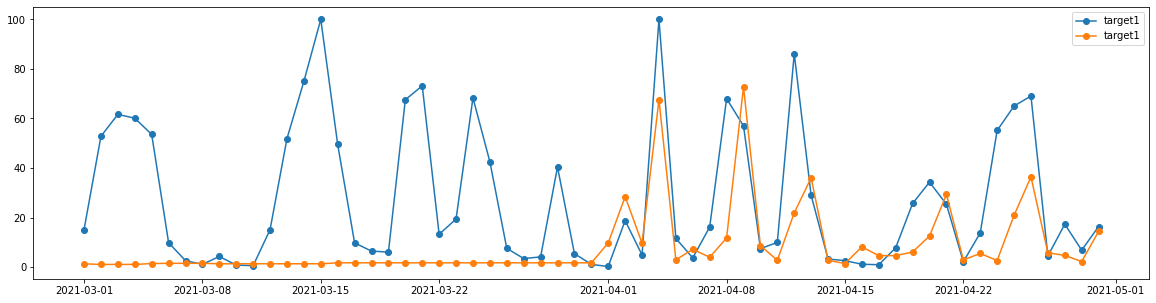

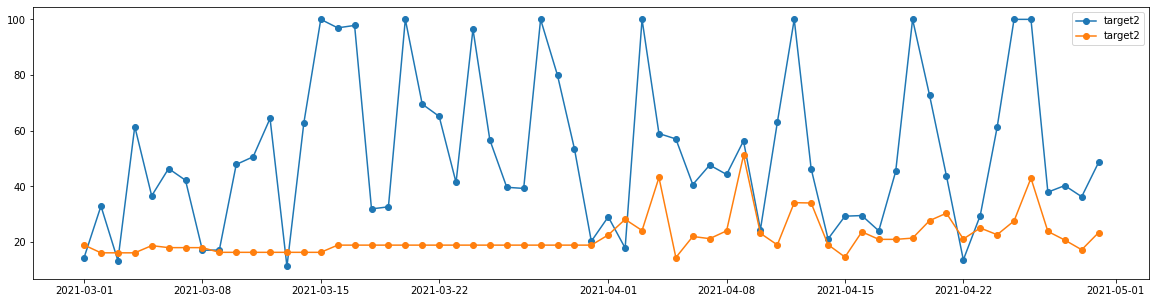

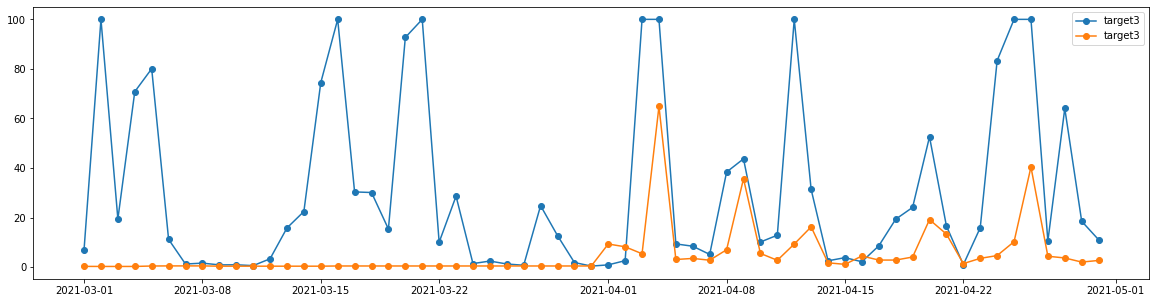

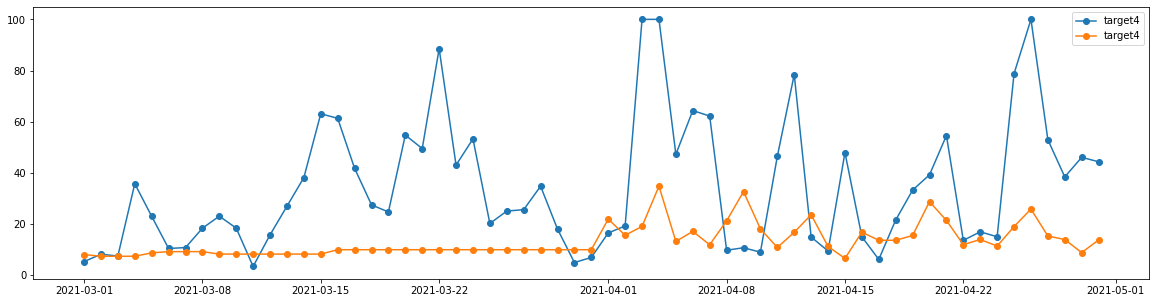

In [477]:
for index in range(1, 5):
    plot_pred(valid_test_prediction, playerId=660271, index=index)